In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001028954"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001028954
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,SB ONE BANCORP
Ticker,SBBX


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,34.0,1.288441e+01,2.968763e+00,9.94,1.112250e+01,11.71,1.294750e+01,20.03
interest income,49.0,6.830388e+06,3.200971e+06,4023000.00,5.227000e+06,5586000.00,6.726000e+06,19832000.00
net income,49.0,8.854898e+05,1.138740e+06,-3027000.00,5.330000e+05,643000.00,9.520000e+05,5823000.00
net interest income,49.0,5.177327e+06,2.572443e+06,2849000.00,3.942000e+06,4301000.00,5.646000e+06,14439000.00
provision for loan losses,49.0,4.888571e+05,3.136076e+05,1000.00,2.790000e+05,403000.00,6.390000e+05,1408000.00


# Plots

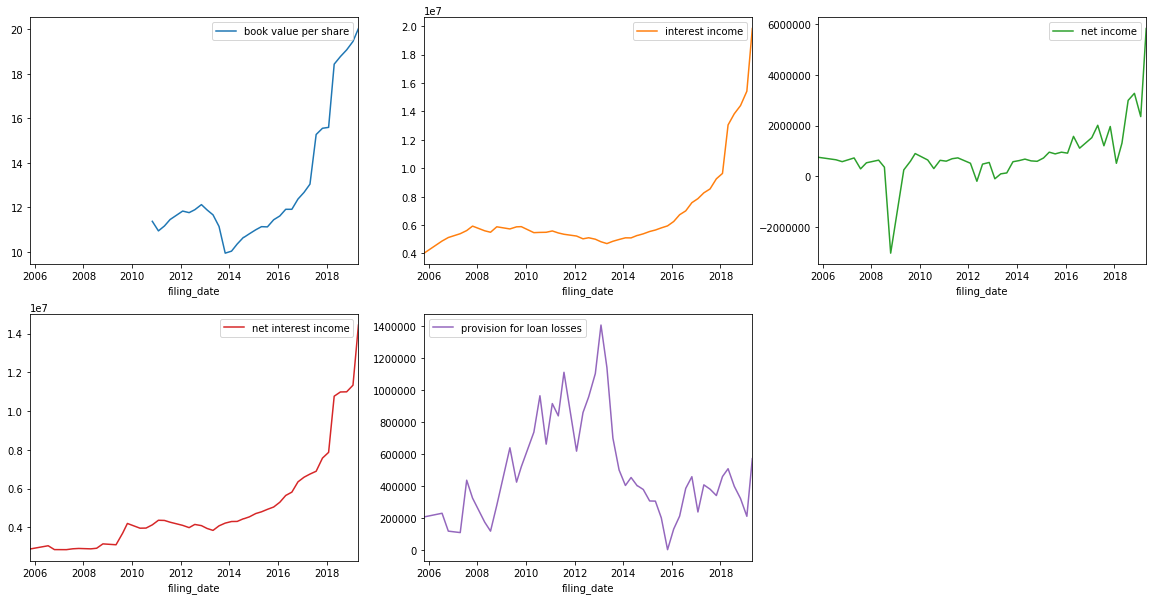

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001028954 book value per share       2005Q3 to 2010Q2: 20 periods  missing   
           book value per share                             2011Q3  missing   
           book value per share                             2016Q2  missing   
           interest income             2005Q4 to 2006Q1: 2 periods  missing   
           interest income                                  2006Q4  missing   
           interest income                                  2007Q4  missing   
           interest income                                  2008Q4  missing   
           interest income                                  2009Q4  missing   
           interest income                                  2011Q3  missing   
           net income                  2005Q4 to 2006Q1: 2 periods  missing   
           net income                                       2006Q4  missing   
           net income                                       2007Q4  missing   
           net income                                       2008Q4  missing   
           net income                                       2009Q4  missing   
           net income                                       2011Q3  missing   
           net interest income         2005Q4 to 2006Q1: 2 periods  missing   
           net interest income                              2006Q4  missing   
           net interest income                              2007Q4  missing   
           net interest income                              2008Q4  missing   
           net interest income                              2009Q4  missing   
           net interest income                              2011Q3  missing   
           provision for loan losses   2005Q4 to 2006Q1: 2 periods  missing   
           provision for loan losses                        2006Q4  missing   
           provision for loan losses                        2007Q4  missing   
           provision for loan losses                        2008Q4  missing   
           provision for loan losses                        2009Q4  missing   
           provision for loan losses                        2011Q3  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001028954 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses 

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()